## Import Libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Load digits dataset

In [2]:
digits = datasets.load_digits()

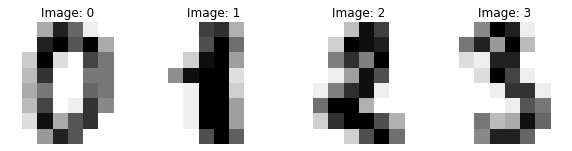

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Image: {}'.format(label))

## Classification

In [4]:
n = len(digits.images)
print("default shape", digits.images.shape)
#The length of the dimension set to -1 is automatically determined by inferring from the specified values of other dimensions. 
data = digits.images.reshape(n,-1)
print("after reshape", data.shape)

default shape (1797, 8, 8)
after reshape (1797, 64)


## Create SVM

In [5]:
clf = svm.SVC(gamma=0.001)

## Training/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=2, shuffle=False)

## Training the model

In [7]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

## Model Prediction

In [8]:
predicted = clf.predict(X_test)

## Visualization

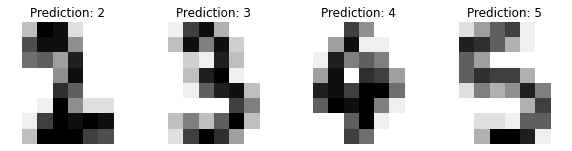

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

## Model Evaluation

In [10]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  2  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  2  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  0  0 35]]


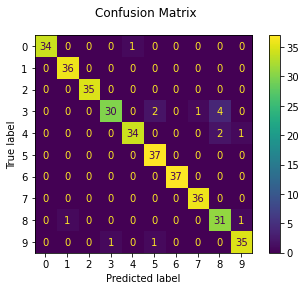

In [11]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()